In [22]:
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート
# 標準ライブラリ
import os
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()
    
    

# 国内ゲームハード週販レポート (2025-12-14) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移

Switch2の販売台数は先週の20万台とほぼ同数の19万台でした｡
ついに任天堂が連続大量出荷を開始しました｡
累計は336万台に到達｡WiiUの国内累計330万台を半年で超えました｡

逆にSwitchは2万台減少して3万台です｡
我々は **クリスマス期に減少するSwitch** を史上初めて観測しています｡
Switchの内訳を見てみると､

- Switch: 6712
- Switch Lite: 14885
- Switch OLED: 9747

いつもはOLED版が最も売れるのですが､今週はLiteが最多です｡
通常版､OLED版の需要は入手性が改善されたSwitch2に移行し､Switch2では代替の効かないLite需要が残っていると思われます｡
Switch2移行が極めて順調に進んでいると言えるでしょう｡

PS5は先週から7千台減少して約1万9千台｡非セール期間としては先週の予想通りです｡
正月明けには1万5千〜1万程度で安定するでしょう｡

In [23]:
df1 = hs.load_hard_sales()
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=gu.weeks_before(report_date, 3), end=report_date)
display(style1)

## 週販推移

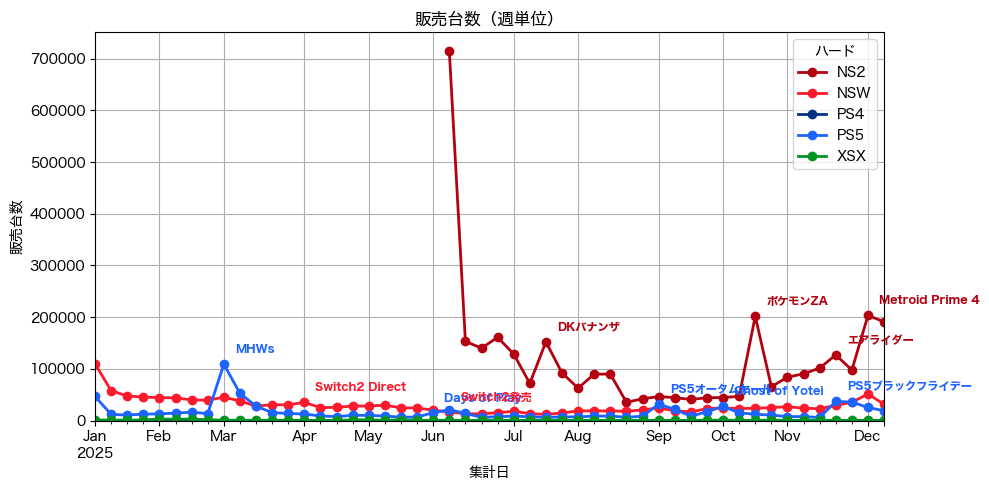

In [24]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, event_mask=report_event_mask)

### 週販推移(拡大）

Switch2の20万台超の出荷がこの先2〜3週間継続するかどうかが注目点です｡
それに伴い､クリスマス期にもかかわらず､Switchがどこまで減少するのか｡

PS5は､19日からクリスマスセールが始まりましたが､あまり効果がある内容とは思えないので､
年内は2万弱で推移するでしょう｡


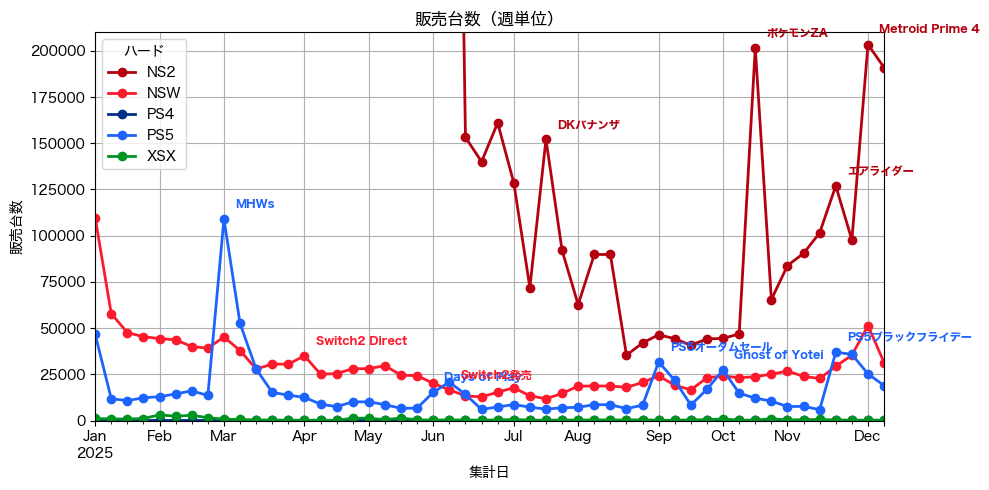

In [25]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, ymax=210000, event_mask=report_event_mask)

## 月間販売推移

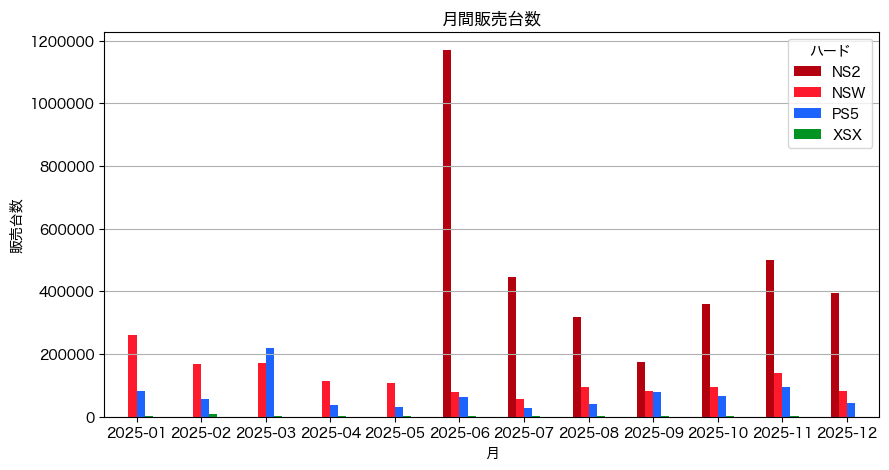

In [29]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=gu.report_begin(report_date), end=report_date,
                                        stacked=False)

今週のようなペースでSwitch2の出荷が続くなら12月に80万台に達するかもしれません｡
その場合は､累計は370万台を超えます｡


In [30]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}', 'XSX': '{:,.0f}'})
display(df)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2025-01,0,"260,447","81,587","3,861"
2025-02,0,"167,188","56,886","9,751"
2025-03,0,"171,921","218,300","2,081"
2025-04,0,"113,513","38,983","1,710"
2025-05,0,"106,506","32,001","3,467"
2025-06,"1,169,684","78,097","63,516","1,400"
2025-07,"444,706","57,532","28,959","1,197"
2025-08,"319,690","94,517","39,004","1,599"
2025-09,"175,542","82,946","78,693","1,121"


### Nintendo Switchの月間販売台数： 2023,2024年との比較

先週は「12月も意外と前年比50％程度には到達するかも」と書きましたが､
Switch2の大量出荷によりSwitch→Switch2へのシフトが相当な速さで進行しています｡
12月の前年比は劇的な落ち込みを見せるかもしれません｡


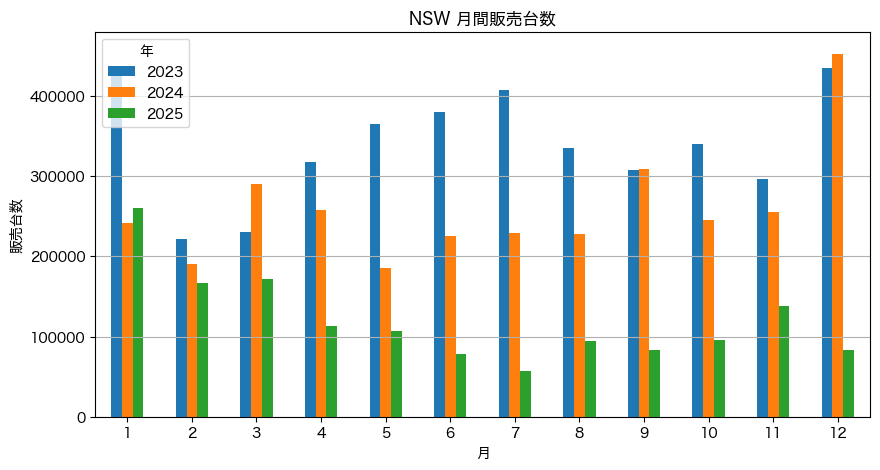

In [32]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

### PlayStation 5の月間販売台数： 2023, 2024年との比較

クリスマスセールが始まりましたが､あまり効果的なセール内容には見えません｡
12月のPS5は10万台を切り､11月より少ない8万台程度になりそうです｡

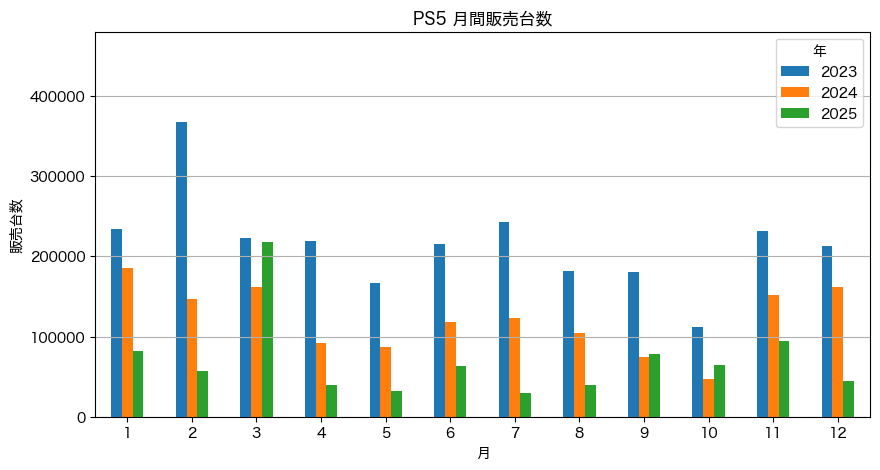

In [34]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

## 累計販売推移



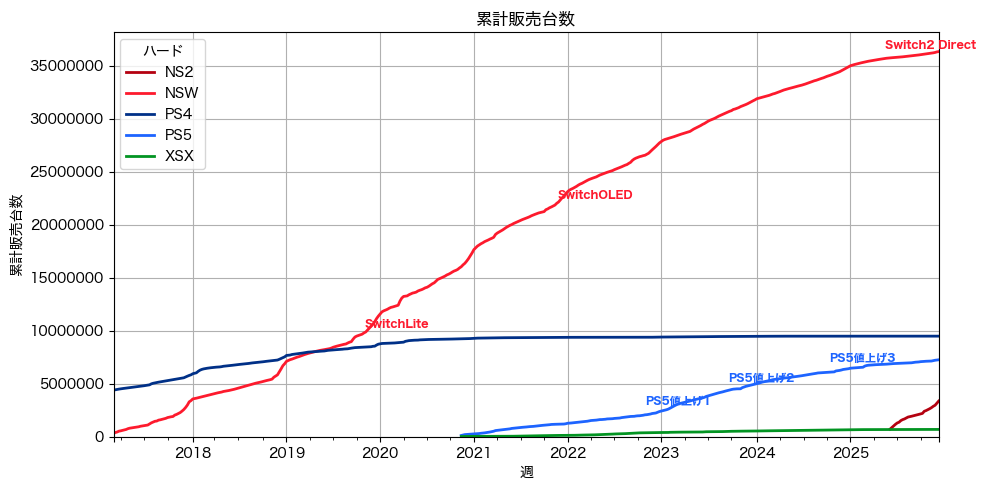

In [36]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = long_range_event_mask)


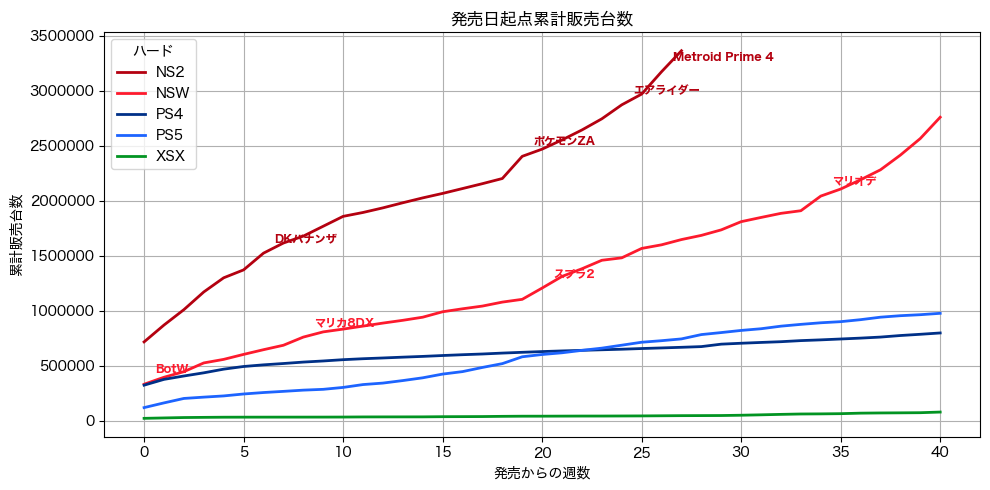

In [38]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=40, event_mask=report_event_mask)

In [11]:
# df

### Switch2/PS5差分

Switch2とPS5の差は389万台に迫りました｡今月中にはSwitch2累計はPS5累計の半分(363万台)を超えるでしょう｡

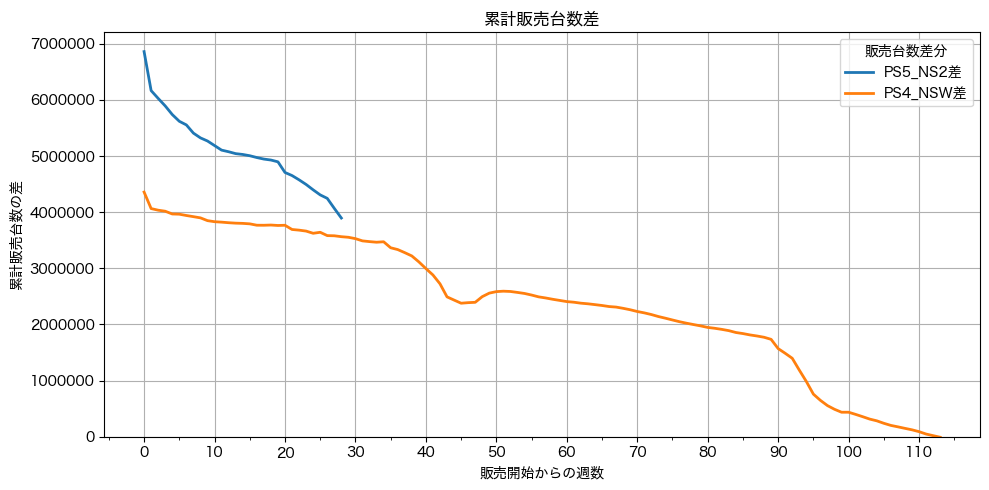

In [52]:
(fig4, d4) = ph.plot_cumsum_diffs(cmplist = [('NS2', 'PS5'), ('NSW', 'PS4')], xgrid=10)

### PS5/PS4差分

PS4とPS5の推移差は日本版の値下げによっても縮まっていません｡

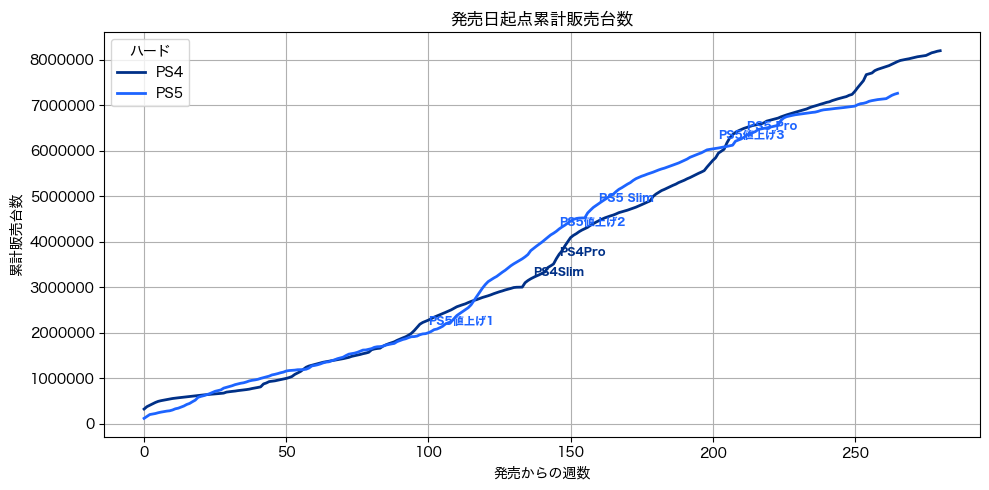

In [56]:
middle_range_event_mask = he.EventMasks(hard=1.5, soft=0, event=1, price=1, sale=0)
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=280, event_mask=middle_range_event_mask)


## Switch2初動状況

Switch2は今週も順調に歴代初動1位の座をキープしています｡

ただ､グラフを見てわかるようにGBAの年末商戦効果が38週から始まるので､
そこまでにどれだけGBAと差をつけられるかに注目です｡

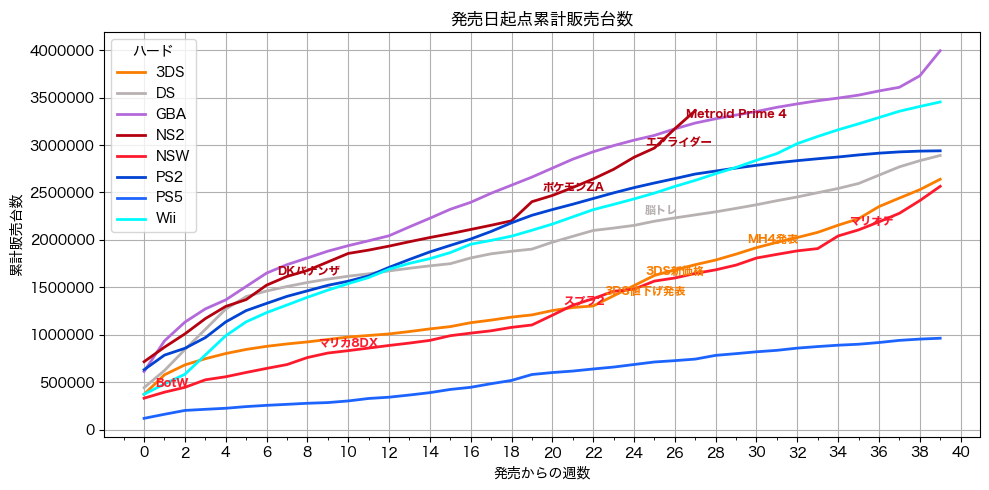

In [44]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=39,
                                        event_mask=report_event_mask)

In [46]:
df12 = df.iloc[df.index == 27]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

,週数,販売数
ハード,,
NS2,27,"3,362,777"
GBA,27,"3,232,067"
PS2,27,"2,694,168"
Wii,27,"2,627,410"
DS,27,"2,263,507"
3DS,27,"1,738,278"
NSW,27,"1,645,931"
PS5,27,"742,726"


## 年単位の状況

2025年の販売台数が568万台に到達しました。
Switch2の出荷ペースがこのまま続くなら､あと50万台程度加算されるので
2018年、2019年の記録を超えて、年間610万台に到達しそうです｡順調なら2022年の626万台を超えるかも｡


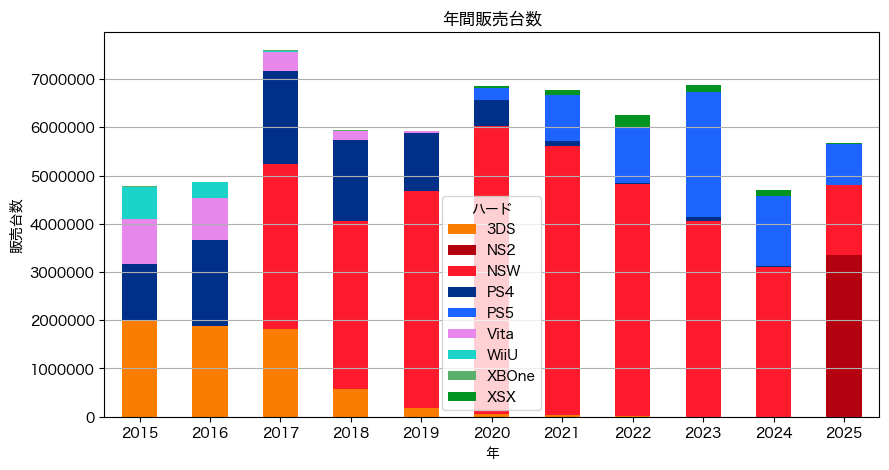

In [47]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [49]:
# df["sum"] = df.sum(axis=1)
# df

### 年単位のメーカーシェア

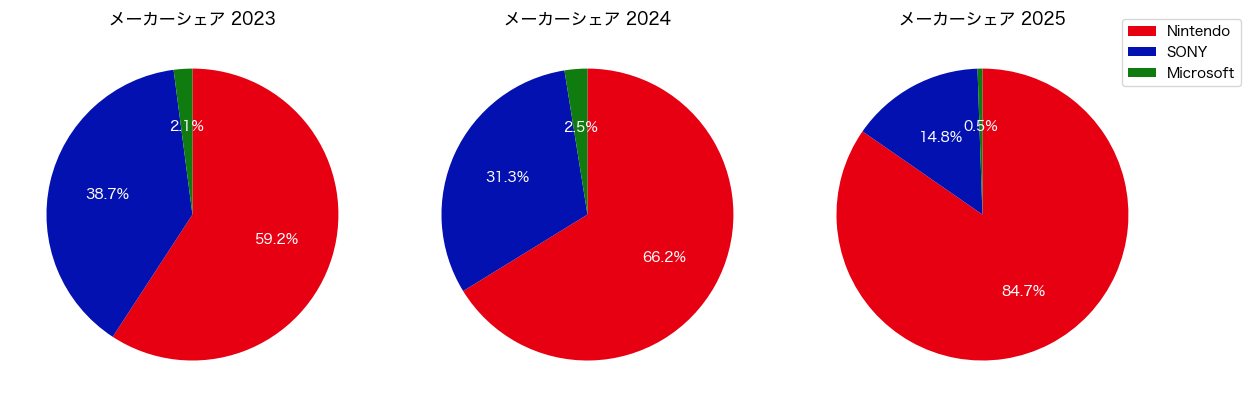

In [51]:
(fig, df) = ph.plot_maker_share_pie(begin_year=gu.years_ago(report_date, 2).year, end_year=report_date.year)